<a href="https://colab.research.google.com/github/Jessvcv/SURFSResearch/blob/main/ResearchSURFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mord
!pip install dmba

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=8849360726021ffdd907b430bdf0b3d7c234839a7f8fc8163dcde71bc7787951
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import mord as m
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
import dmba
from dmba import regressionSummary
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
%matplotlib inline

Colab environment detected.


In [ ]:
path = '/content/drive/MyDrive/DSC1010_Spring2024/attention_detection_dataset_v1.csv'
data = pd.read_csv(path)

In [ ]:
data.head(40)

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
0,1,256.643658,144.163663,169.071331,169.066601,88.813317,0,down,-11.569698,-1.612015,0,0,0,0,0,0.000000,1
1,1,252.967014,137.871659,163.131542,163.126974,86.704057,0,down,-15.000000,10.000000,0,0,0,0,0,0.000000,1
2,1,254.416771,134.427950,155.147362,155.145836,88.408792,0,down,-12.705953,0.082978,0,0,0,0,0,0.000000,1
3,2,256.315517,246.199763,141.227055,141.227217,89.279491,2,right,32.585681,36.572800,1,117,137,276,421,0.866140,1
4,1,293.000126,285.859563,197.011509,196.998653,80.872309,2,forward,-4.013085,-9.905692,0,0,0,0,0,0.000000,1
5,1,430.241623,177.893419,126.719398,126.718884,68.329245,0,forward,6.472189,4.480845,0,0,0,0,0,0.000000,0
6,1,307.529125,210.028131,162.727566,162.726860,88.881159,0,left,3.737665,-14.432352,0,0,0,0,0,0.000000,1
7,1,364.795265,272.800767,163.461304,163.457422,90.324628,0,down,-15.000000,10.000000,0,0,0,0,0,0.000000,1
8,1,376.335259,274.385087,164.532433,164.531021,91.509396,0,down,-15.000000,10.000000,0,0,0,0,0,0.000000,1
9,1,367.168770,270.843184,150.267334,150.267019,82.097656,0,down,-15.000000,10.000000,0,0,0,0,0,0.000000,1


In [ ]:
label_encoder = LabelEncoder()
data['pose'] = label_encoder.fit_transform(data['pose'])
print("\nLabel Encoded Data:")
print(data)


Label Encoded Data:
      no_of_face      face_x      face_y      face_w      face_h   face_con  \
0              1  256.643658  144.163663  169.071331  169.066601  88.813317   
1              1  252.967014  137.871659  163.131542  163.126974  86.704057   
2              1  254.416771  134.427950  155.147362  155.145836  88.408792   
3              2  256.315517  246.199763  141.227055  141.227217  89.279491   
4              1  293.000126  285.859563  197.011509  196.998653  80.872309   
...          ...         ...         ...         ...         ...        ...   
3995           1  271.275997  245.705883  183.263645  183.258476  90.905857   
3996           1  145.687513  176.579046  123.688402  123.688745  87.351382   
3997           1  142.701006  264.146090  131.865740  131.866093  77.186871   
3998           1  208.827534  181.304083  162.526874  162.526646  94.798380   
3999           1  142.144842  177.090197  128.746252  128.746605  87.585974   

      no_of_hand  pose     pos

In [ ]:
data.head(30)

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
0,1,256.643658,144.163663,169.071331,169.066601,88.813317,0,0,-11.569698,-1.612015,0,0,0,0,0,0.000000,1
1,1,252.967014,137.871659,163.131542,163.126974,86.704057,0,0,-15.000000,10.000000,0,0,0,0,0,0.000000,1
2,1,254.416771,134.427950,155.147362,155.145836,88.408792,0,0,-12.705953,0.082978,0,0,0,0,0,0.000000,1
3,2,256.315517,246.199763,141.227055,141.227217,89.279491,2,3,32.585681,36.572800,1,117,137,276,421,0.866140,1
4,1,293.000126,285.859563,197.011509,196.998653,80.872309,2,1,-4.013085,-9.905692,0,0,0,0,0,0.000000,1
5,1,430.241623,177.893419,126.719398,126.718884,68.329245,0,1,6.472189,4.480845,0,0,0,0,0,0.000000,0
6,1,307.529125,210.028131,162.727566,162.726860,88.881159,0,2,3.737665,-14.432352,0,0,0,0,0,0.000000,1
7,1,364.795265,272.800767,163.461304,163.457422,90.324628,0,0,-15.000000,10.000000,0,0,0,0,0,0.000000,1
8,1,376.335259,274.385087,164.532433,164.531021,91.509396,0,0,-15.000000,10.000000,0,0,0,0,0,0.000000,1
9,1,367.168770,270.843184,150.267334,150.267019,82.097656,0,0,-15.000000,10.000000,0,0,0,0,0,0.000000,1


In [ ]:
predictors = ['no_of_face', 'no_of_hand', 'pose', 'phone_con', 'phone']
outcome = 'label'

In [ ]:
X = pd.get_dummies(data[predictors], drop_first=True)
y = data[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.5,
  random_state=1)

In [ ]:
edu_lm = LinearRegression()
edu_lm.fit(train_X, train_y)

LinearRegression()

In [ ]:
print('intercept ', edu_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': edu_lm.coef_}))

intercept  0.4834801805479905
    Predictor  coefficient
0  no_of_face    -0.186928
1  no_of_hand    -0.031514
2        pose     0.033355
3   phone_con     0.039447
4       phone     0.646357


In [ ]:
regressionSummary(train_y, edu_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.4243
     Mean Absolute Error (MAE) : 0.3641


In [ ]:
edu_lm_pred = edu_lm.predict(valid_X[predictors])
print(edu_lm_pred)

[0.07995089 0.26687882 0.32990705 ... 0.29839294 0.29655225 0.32990705]


In [ ]:
regressionSummary(valid_y, edu_lm.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.0141
Root Mean Squared Error (RMSE) : 0.4290
     Mean Absolute Error (MAE) : 0.3675


<Axes: >

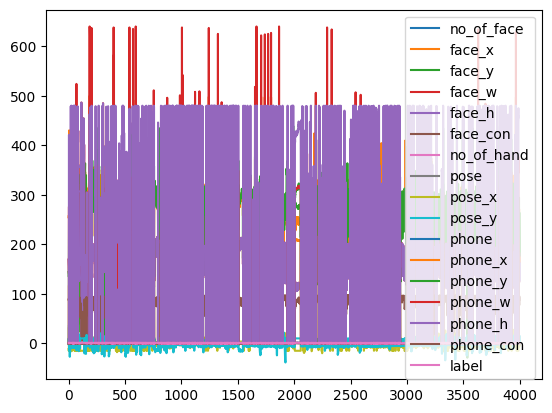

In [ ]:
data.plot()

<Axes: >

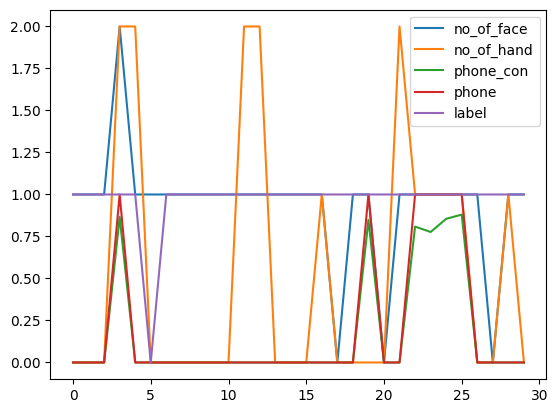

In [ ]:
data1 = pd.read_csv(path, nrows=30)
data_p = data1[['no_of_face', 'no_of_hand', 'pose', 'phone_con', 'phone', 'label']]
data_p.plot()

<Axes: >

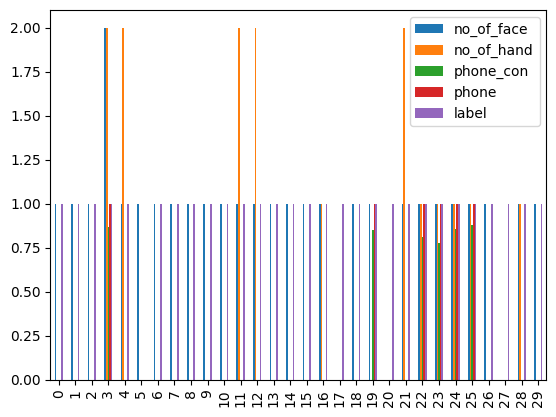

In [ ]:
data_p.plot(kind='bar')

Correlation Coefficient: 0.09284766908852606
R-squared Value: 0.25342028206460265


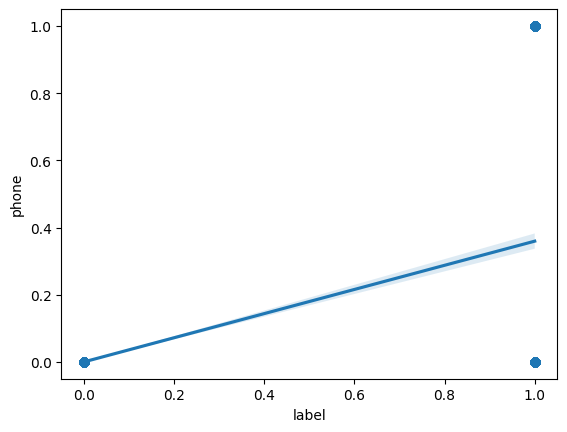

In [ ]:
data1 = pd.read_csv(path, nrows=30)
sb.regplot(x='label', y='phone', data=data, scatter=True)
correlation_coefficient = np.corrcoef(data1['label'], data1['phone'])[0, 1]
r_squared = edu_lm.score(X, y)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"R-squared Value: {r_squared}")

Correlation Coefficient: -0.03448275862068968
R-squared Value: 0.25342028206460265


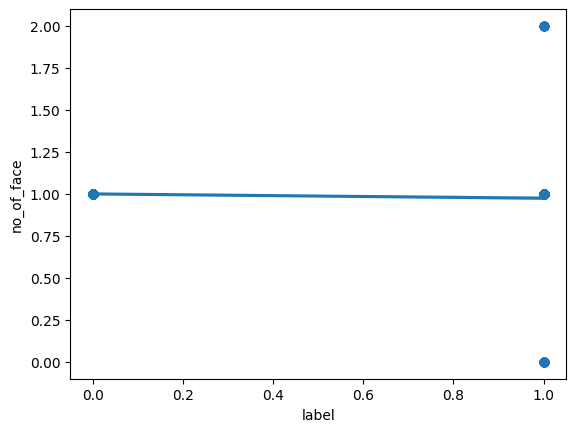

In [ ]:
sb.regplot(x='label', y='no_of_face', data=data, scatter=True)
correlation_coefficient = np.corrcoef(data1['label'], data1['no_of_face'])[0, 1]
r_squared = edu_lm.score(X, y)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"R-squared Value: {r_squared}")

<Axes: xlabel='label', ylabel='pose'>

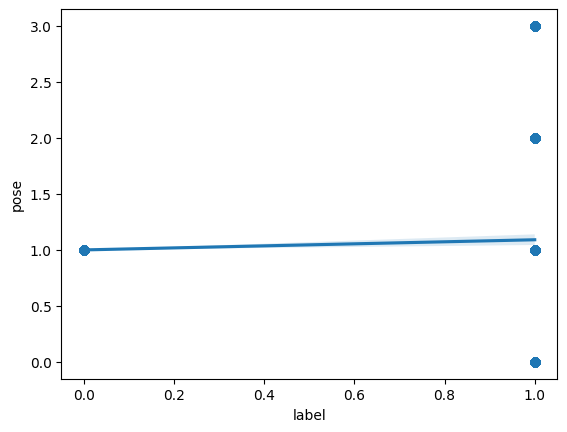

In [ ]:
sb.regplot(x='label', y='pose', data=data, scatter=True)

Correlation Coefficient: 0.12979421621466686
R-squared Value: 0.25342028206460265


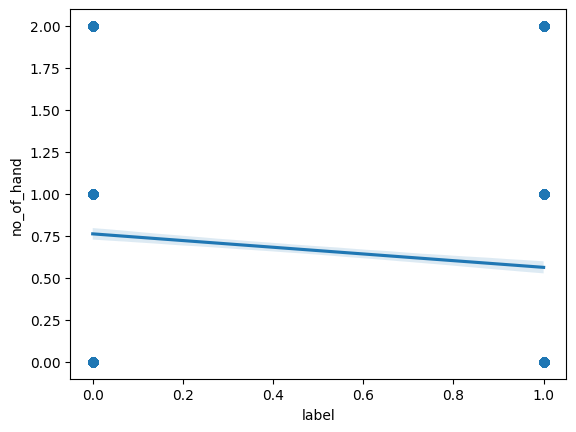

In [ ]:
sb.regplot(x='label', y='no_of_hand', data=data, scatter=True)
correlation_coefficient = np.corrcoef(data1['label'], data1['no_of_hand'])[0, 1]
r_squared = edu_lm.score(X, y)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"R-squared Value: {r_squared}")

Correlation Coefficient: 0.09274407799444302
R-squared Value: 0.25342028206460265


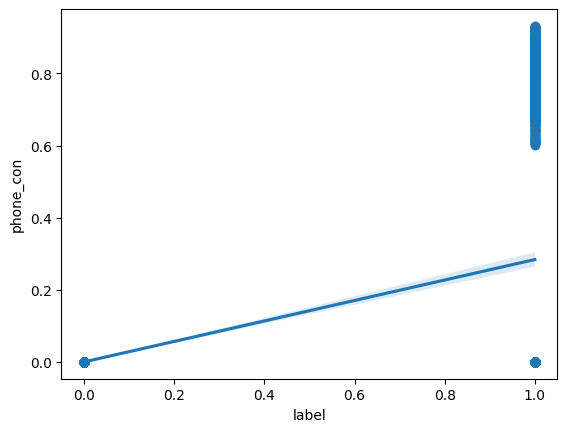

In [ ]:
sb.regplot(x='label', y='phone_con', data=data, scatter=True)
correlation_coefficient = np.corrcoef(data1['label'], data1['phone_con'])[0, 1]
r_squared = edu_lm.score(X, y)
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"R-squared Value: {r_squared}")

In [ ]:
!pip install patsy
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula='label ~ no_of_face + no_of_hand + pose + phone_con + phone', data=data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          8.64e-254
Time:                        14:37:16   Log-Likelihood:                -2260.6
No. Observations:                4000   AIC:                             4533.
Df Residuals:                    3994   BIC:                             4571.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4747      0.044     10.822      0.000       0.389       0.561
no_of_face    -0.2187      0.043     -5.043      0.000      -0.304      -0.134
no_of_hand    -0.0123      0.008     -1.506      0.132      -0.028       0.004
pose           0.0667      0.011      6.181      0.000       0.046       0.088
phone_con      0.0565      0.206      0.274      0.784      -0.347       0.460
phone          0.6297      0.164      3.845      0.000       0.309       0.951
==============================================================================
Omnibus:                     1200.226   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.082
Skew:                           0.884   Prob(JB):                    2.10e-148
Kurtosis:                       2.021   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""